# **Using  Various Machine Learning Techniques to Analyze Voice Disorders for Parkinson's Disease Detection**


----


## Setup


### Installing Required Libraries


In [2]:
%%capture
!mamba install -- upgrade scikit-learn=1.2.1
!mamba install seaborn --y

In [3]:
!pip install dtreeviz
#Will probably have to restart kernel after runnning this installation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 40.3 MB/s eta 0:00:00


<center>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-GPXX01JCEN/Sam.png" alt="example image" title="Example Image" width="300" height="200">


> You need to **restart kernel** by clicking on `Kernel` menu and choosing `Restart kernel`.



### Importing Required Libraries


In [54]:
import skillsnetwork
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Code to suppress warnings generated by code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')


Creating helper function for plotting 


In [3]:
sns.set(style="whitegrid", color_codes=True)
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3*cm.max()/4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Parkinson Data and Voice Disorder

<a href=https://archive.ics.uci.edu/ml/datasets/parkinsons>Voice disorder dataset</a> can be used to detect the presence of Parkinson's disease in an individual. While current tools have limitations in analyzing complex voice disorders, advancements in technology and research have enabled the development of new algorithms that can identify specific acoustic markers associated with Parkinson's disease in voice recordings. Therefore, the analysis of voice disorders can provide valuable information in diagnosing and monitoring Parkinson's disease.



This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD).  Our dataset includes voice attributes Information that can be used for detecting parkinson, these information including:


Matrix column entries (attributes):  
- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- Five measures of variation in Frequency
    - MDVP:Jitter(%) - Percentage of cycle-to-cycle variability of the period duration
    - MDVP:Jitter(Abs) - Absolute value of cycle-to-cycle variability of the period duration
    - MDVP:RAP - Relative measure of the pitch disturbance
    - MDVP:PPQ - Pitch perturbation quotient
    - Jitter:DDP - Average absolute difference of differences between jitter cycles
- Six measures of variation in amplitude
    - MDVP:Shimmer - Variations in the voice amplitdue
    - MDVP:Shimmer(dB) - Variations in the voice amplitdue in dB
    - Shimmer:APQ3 - Three point amplitude perturbation quotient measured against the average of the three amplitude
    - Shimmer:APQ5 - Five point amplitude perturbation quotient measured against the average of the three amplitude
    - MDVP:APQ - Amplitude perturbation quotient from MDVP
    - Shimmer:DDA - Average absolute difference between the amplitudes of consecutive periods
- Two measures of ratio of noise to tonal components in the voice
    - NHR - Noise-to-harmonics Ratio and 
    - HNR - Harmonics-to-noise Ratio
- status - Health status of the subject (one) - Parkinson's, (zero) - healthy
- Two nonlinear dynamical complexity measures
    - RPDE - Recurrence period density entropy
    - D2 - correlation dimension
- DFA - Signal fractal scaling exponent
- Three nonlinear measures of fundamental frequency variation
    - spread1 - discrete probability distribution of occurrence of relative semitone variations
    - spread2 - Three nonlinear measures of fundamental frequency variation
    - PPE - Entropy of the discrete probability distribution of occurrence of relative semitone variations


## Loading data


In [4]:
data = pd.read_csv('parkinsons.data', sep=',', index_col='name') # assign index column to name 
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


we can see the number of samples 


In [5]:
print(data.shape)

(195, 23)


Correlation models generation

<AxesSubplot:>

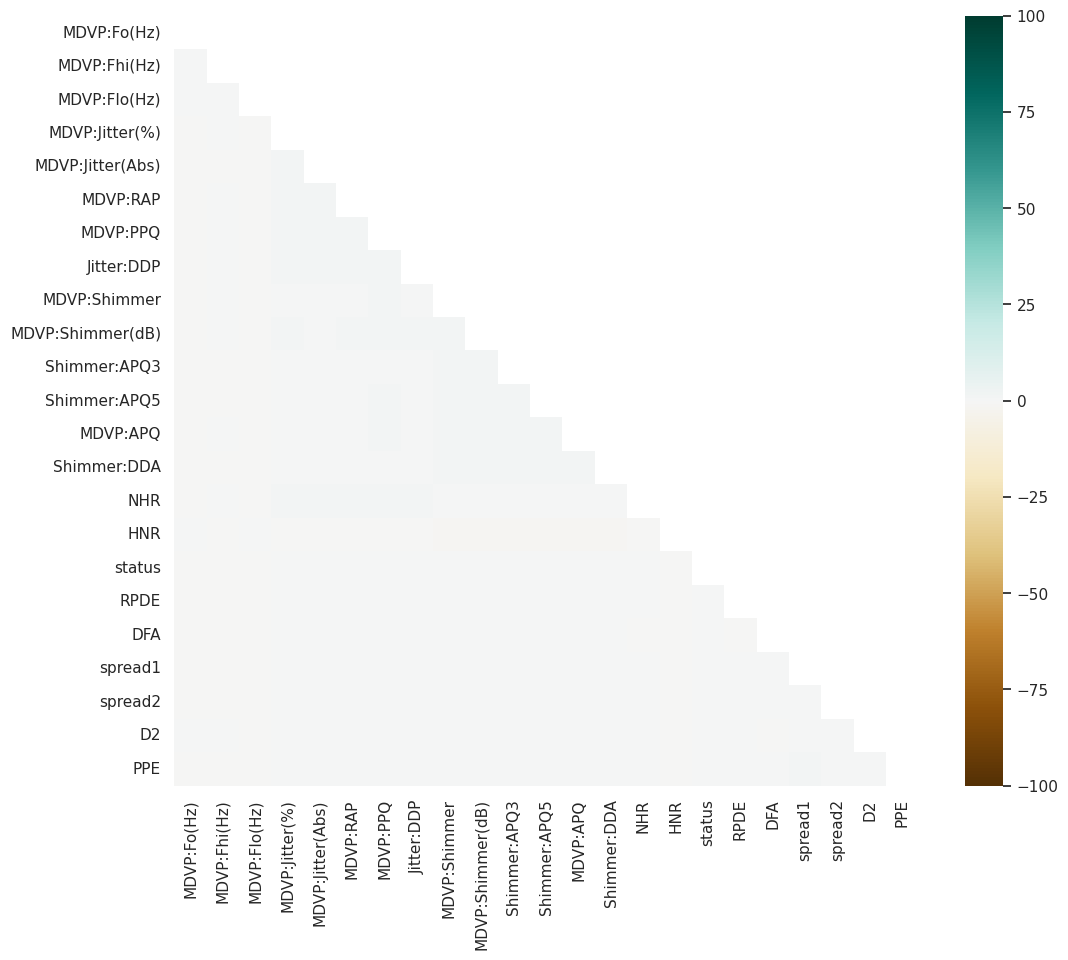

In [6]:
# creating the correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
sns.heatmap(data.corr(),vmin=-100, vmax=100,cmap='BrBG', mask=mask)

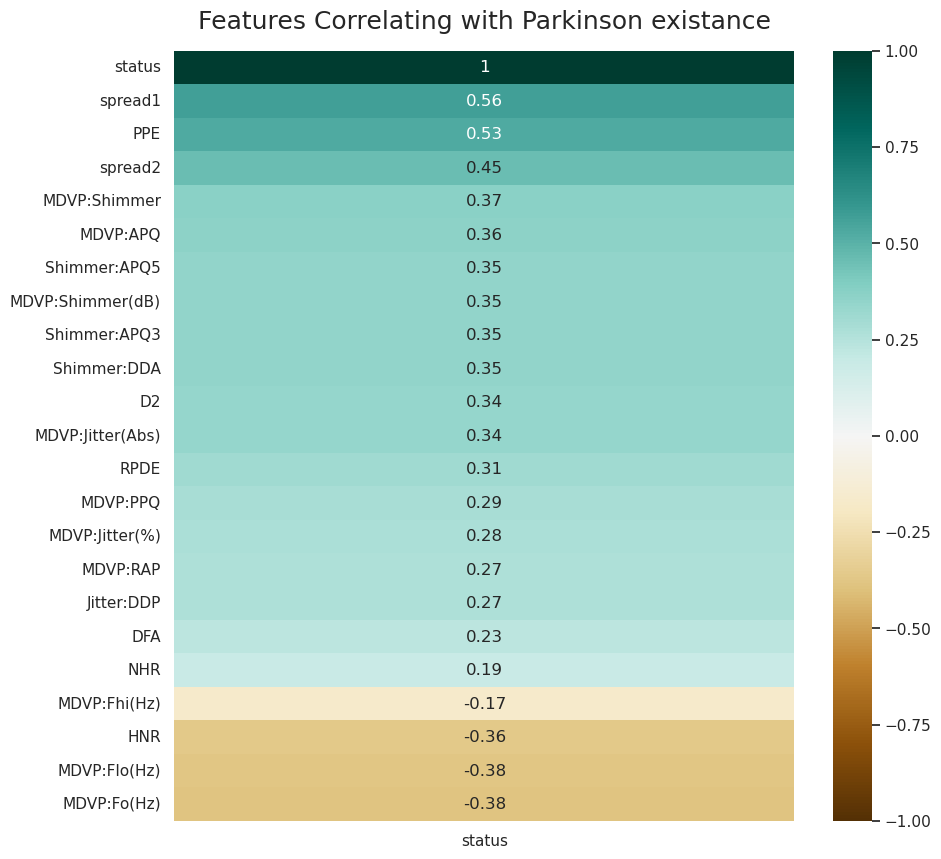

In [ ]:
# to show correlation variables to the status 
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(data.corr()[['status']].sort_values(by='status', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Parkinson existance', fontdict={'fontsize':18}, pad=16);

Dropping 'status'

In [ ]:
X = data.drop('status', axis=1)
X.head()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
name,,,,,,,,,,,,,,,,,,,,,
phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [9]:
y=data['status']
y.head()

name
phon_R01_S01_1    1
phon_R01_S01_2    1
phon_R01_S01_3    1
phon_R01_S01_4    1
phon_R01_S01_5    1
Name: status, dtype: int64

checking to see classification of Parkinson's disease from actual Data


In [11]:
y.value_counts(normalize=True)

1    0.753846
0    0.246154
Name: status, dtype: float64

Applying t-SNE data analysis (similar to PCA Data Analysis)


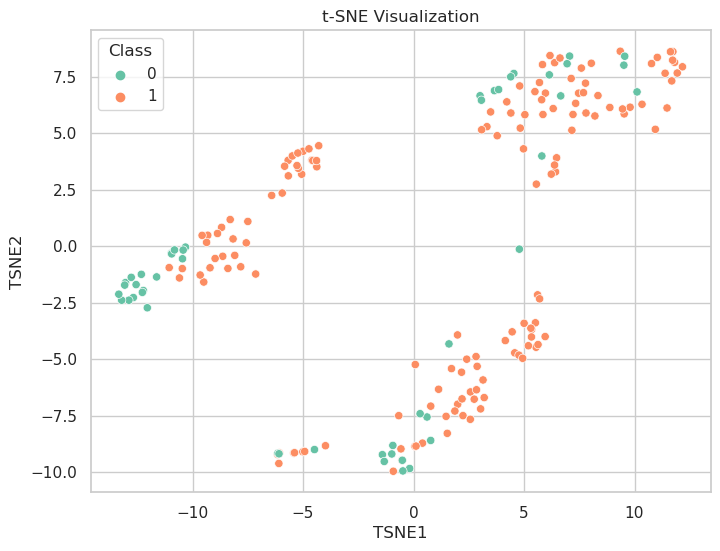

In [12]:
import seaborn as sns
from sklearn.manifold import TSNE

# Apply t-SNE to reduce the dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame with the t-SNE-transformed data and class labels
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Class'] = y.values

# Visualize the data based on class using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2')
plt.title('t-SNE Visualization')
plt.show()

## Data preparation


In [13]:


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)


# print the shape of train and test data
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (136, 22)
y_train shape:  (136,)
X_test shape:  (59, 22)
y_test shape:  (59,)


## k-Nearest Neighbors (k-NN)


In [14]:
from sklearn.neighbors import KNeighborsClassifier

Creating a knn object 


In [15]:
knn = KNeighborsClassifier(n_neighbors=3)

Fitting the object


In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

Making predictions on the testing data


In [17]:
y_pred = knn.predict(X_test)
y_pred[0:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

Probability of belonging to a each class for each sample, here are the first ten


In [18]:
knn.predict_proba(X_test)[0:10]

array([[0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]])

Confusion Matrix of the result


In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

Confusion matrix, without normalization
[[ 9  3]
 [ 5 42]]


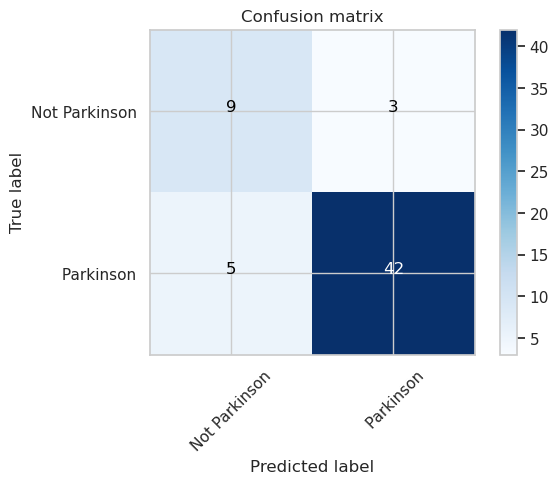

In [20]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')

In [21]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.93      0.89      0.91        47

   micro avg       0.86      0.86      0.86        59
   macro avg       0.79      0.82      0.80        59
weighted avg       0.87      0.86      0.87        59


Accuracy Score: 0.864406779661017


## GridSearchCV


In [22]:

param_grid = {
    'n_neighbors': [3, 5, 7, 9],

}


In [23]:

knn = KNeighborsClassifier()



The resulting grid_search object can be used to fit the data and obtain the best hyperparameters that maximize the performance metric.


In [24]:
from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(knn, param_grid, scoring='recall', cv=5)

grid_search 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 5, 7, 9]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

Fitting the grid search to the training data


In [25]:

grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 5, 7, 9]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

Printing the best parameters and score on validation data 


In [26]:

print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'n_neighbors': 9}
Best Score:  0.970220588235294


Get the predicted labels on the test data using the best estimator:


In [27]:

y_pred = grid_search.best_estimator_.predict(X_test)



Calculate the recall score on the test data using the predicted labels:


In [28]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)

recall

0.9148936170212766

In [29]:
y_hat = grid_search.best_estimator_.predict(X)

Now we use these best paramenters to our data to train the model 


In [30]:
knn = KNeighborsClassifier()
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

let's study our predictions  


In [31]:
y_hat =knn.predict(X)

Confusion matrix, without normalization
[[ 32  16]
 [  5 142]]


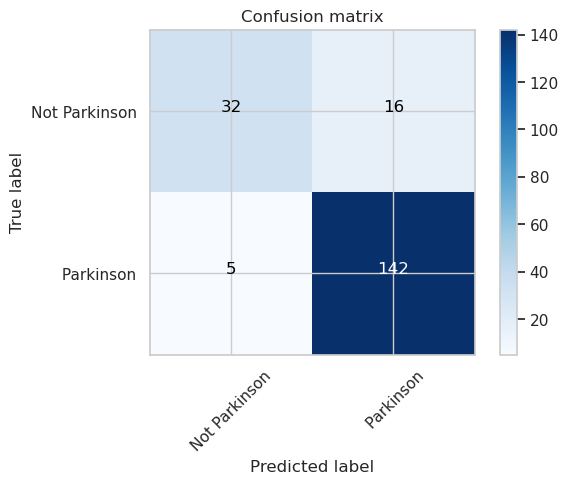

In [32]:
plot_confusion_matrix(confusion_matrix(y, y_hat),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')

### Machine Learning Interpretability


In [33]:
# find true positives(tp)
tsne_df['label']=''
tsne_df['label'].iloc[np.where((y_hat == 1) & (y == 1))]="TP"
# find true negatives (tn)
tsne_df['label'].iloc[np.where((y_hat == 0) & (y == 0))]="TN"
# find false positives (fp)
tsne_df['label'].iloc[np.where((y_hat == 1) & (y == 0))]="FP" 
# find false negatives (fp)
tsne_df['label'].iloc[np.where((y_hat == 0) & (y == 1))]="FN"

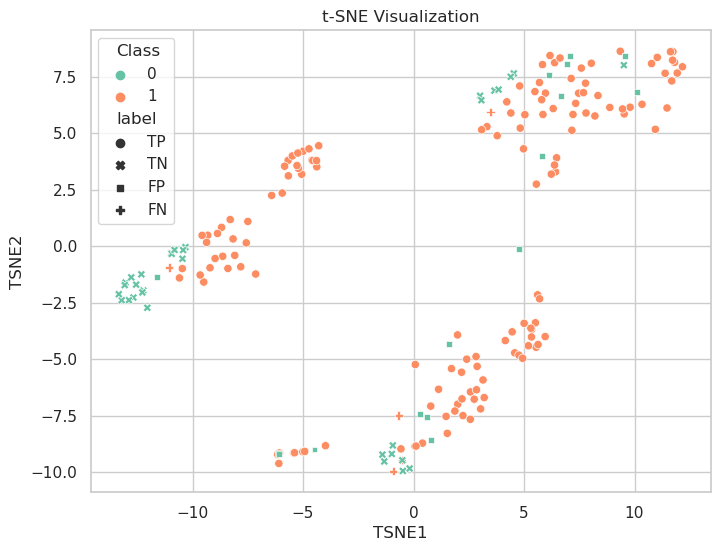

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Class', palette='Set2',style='label')
plt.title('t-SNE Visualization')
plt.show()

## Logistic Regression


In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
y_pred = lr.predict(X_test)
y_pred[0:10]

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [38]:
lr.predict_proba(X_test)[0:10]


array([[0.27614786, 0.72385214],
       [0.6581403 , 0.3418597 ],
       [0.08383037, 0.91616963],
       [0.34049092, 0.65950908],
       [0.07437112, 0.92562888],
       [0.27530823, 0.72469177],
       [0.00911557, 0.99088443],
       [0.49763605, 0.50236395],
       [0.86002224, 0.13997776],
       [0.90363001, 0.09636999]])

Confusion matrix and classification Report


Confusion matrix, without normalization
[[ 9  3]
 [ 5 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.93      0.89      0.91        47

   micro avg       0.86      0.86      0.86        59
   macro avg       0.79      0.82      0.80        59
weighted avg       0.87      0.86      0.87        59


Accuracy Score: 0.864406779661017


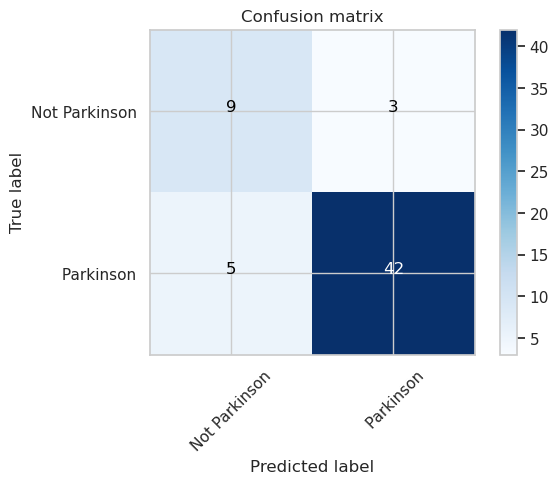

In [39]:

plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

In [40]:
coef=abs(lr.coef_[0])

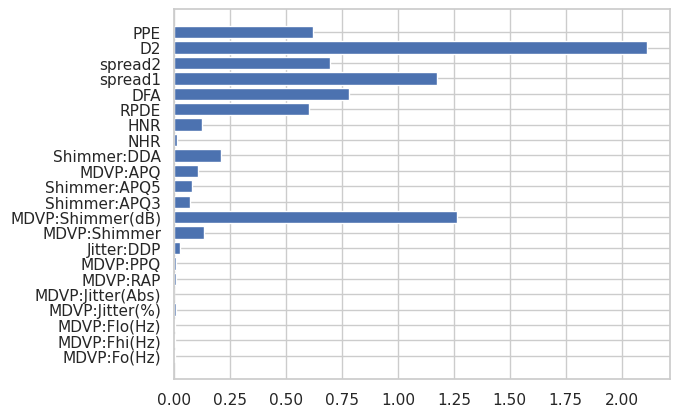

In [41]:
plt.barh(X.columns, coef)
plt.show()

Selecting the features with the highest magnitude coefficients 


In [42]:
best_columns=X.columns[np.argsort(-1*coef)[0:5]]
best_columns

Index(['D2', 'MDVP:Shimmer(dB)', 'spread1', 'DFA', 'spread2'], dtype='object')

Confusion matrix, without normalization
[[ 9  3]
 [ 5 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.75      0.69        12
           1       0.93      0.89      0.91        47

   micro avg       0.86      0.86      0.86        59
   macro avg       0.79      0.82      0.80        59
weighted avg       0.87      0.86      0.87        59


Accuracy Score: 0.864406779661017


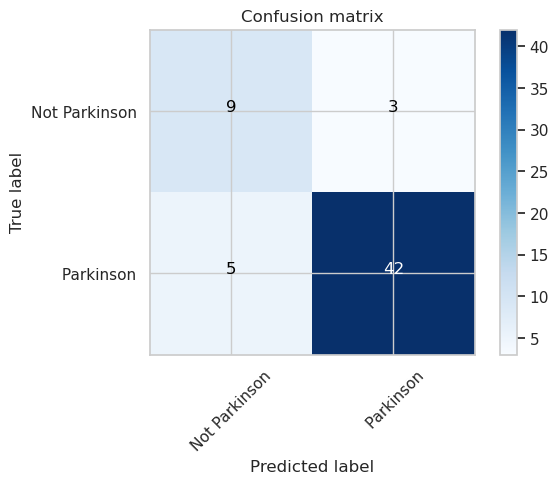

In [44]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train[best_columns], y_train)

# Get the predicted probabilities for each class
y_pred_proba = log_reg.predict_proba(X_test[best_columns])

plot_confusion_matrix(confusion_matrix(y_test, y_pred),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

## Support Vector Machines (SVM)

### Exercise: Train and Test SVM Model using the SVC constructor and display the confusion matrix, use the appropriate datasets for each task.


Confusion matrix, without normalization
[[ 1 11]
 [ 0 47]]


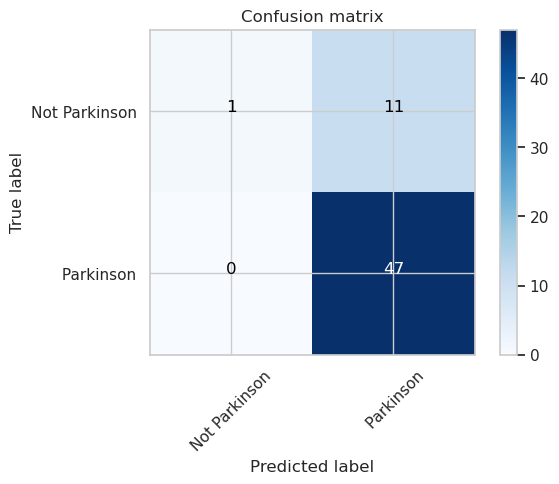

In [47]:
# Train the SVM classifier
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)

y_hat = svm.predict(X_test)

# confusion_matrix
plot_confusion_matrix(confusion_matrix(y_test, y_hat),classes=[ "Not Parkinson", " Parkinson"],title='Confusion matrix')

In [48]:
param_grid = {
    'C': [0.1, 1,],
    'gamma': [0.1, 1, 10],

}

In [50]:
# Train the SVM classifier
from sklearn import svm
svm = svm.SVC()

grid_search = GridSearchCV(svm, param_grid, scoring='recall', cv=2)


grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding recall score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best recall score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 0.1, 'gamma': 0.1}
Best recall score:  1.0


##  Random Forest Model



In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=123)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 88.14%


In [52]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


best_model = grid_search.best_estimator_

Best parameters: {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}


Using `pickle` to save the trained model


In [ ]:
import pickle

# Save the model to a file
filename = 'rf_model_parkinson'
pickle.dump(rf, open(filename, "wb"))

### Visualizing the Decision Trees using `dtreeviz` library




In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Use GridSearchCV to search for the best parameters
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

In [ ]:

clf=grid_search.best_estimator_
y_pred = clf.predict(X_test)


Next, we plot the tree:


In [ ]:
# plot the tree 
import dtreeviz

feature_names = list(X_train.columns)

viz_model = dtreeviz.model(clf,
                           X_train=X_train, y_train=y_train, 
                           feature_names=feature_names)

v = viz_model.view(fancy=True)     # render as SVG into internal object 
v

Let's choose a random point and visualize the decision path:


In [ ]:
# get a random point
rand = np.random.randint(0, len(X))
sample_point = X.iloc[rand,:].values

# visualizing the path for the point
v = viz_model.view(fancy=True,scale=1.5,x=sample_point,show_just_path=True)
v